In [1]:
#https://www.kaggle.com/enzus01/two-style-of-blending-and-double-blend-03d58b/notebook?scriptVersionId=9116365
import numpy as np
import pandas as pd
import os

from scipy.stats import rankdata

# DATA VIZUALIZATION LIBRARIES
from matplotlib import pyplot as plt
import seaborn as sns

# METRICS TO MEASURE RMSE
from math import sqrt
from sklearn import metrics
LABELS = ["HasDetections"]

In [3]:
!ls


blender-v2 .695.ipynb           super_blend.csv
blender-v3.695.ipynb            v1.csv
blender-v4.ipynb                v1_extrem.csv
blender-v5.ipynb                v2_extrem.csv
blender-v6.ipynb                v3.zip
blender-weight average-v2.ipynb v3_extrem.csv
blender-weight average.ipynb    v4.csv
blender.ipynb                   v5.csv
lgb_submission01.csv            v5.zip
merge_mymodels.csv              v6.csv
merge_mymodels.zip              v6.zip
nffm_submission.csv             v7.csv
submitVersion2_11.csv           v7.zip
submitVersion2_24.csv           v8.csv
submitVersion2_27.csv           v8.zip
submitv1.csv                    v9.csv
super_blend.695csv.csv          v9.zip


In [4]:
#ALL PUBLIC SOLUTION RMSE < 0.2269 (WITHOUT REPETITIONS)
df_base0 = pd.read_csv("v9.csv",names=["MachineIdentifier","HasDetections0"], skiprows=[0],header=None)
df_base1 = pd.read_csv("super_blend.695csv.csv",names=["MachineIdentifier","HasDetections1"], skiprows=[0],header=None)
#df_base1 = pd.read_csv("submitVersion2_11.csv",names=["MachineIdentifier","HasDetections2"], skiprows=[0],header=None)
#df_base2 = pd.read_csv("nffm_submission.csv",names=["MachineIdentifier","HasDetections2"], skiprows=[0],header=None)
#df_base3 = pd.read_csv("lgb_submission01.csv",names=["MachineIdentifier","HasDetections3"], skiprows=[0],header=None)
#df_base4 = pd.read_csv("v5.csv",names=["MachineIdentifier","HasDetections4"], skiprows=[0],header=None)
#df_base5 = pd.read_csv("submitVersion2_27.csv",names=["MachineIdentifier","HasDetections6"], skiprows=[0],header=None)


#df_base2 = pd.read_csv("v2_extrem.csv",names=["MachineIdentifier","HasDetections3"], skiprows=[0],header=None)
#df_base3 = pd.read_csv("lgb_submission01.csv",names=["MachineIdentifier","HasDetections4"], skiprows=[0],header=None)
#df_base1 = pd.read_csv("submitVersion2_11.csv",names=["MachineIdentifier","HasDetections2"], skiprows=[0],header=None)

#df_base4 = pd.read_csv("submitVersion2_24.csv",names=["MachineIdentifier","HasDetections5"], skiprows=[0],header=None)
#df_base5 = pd.read_csv("submitVersion2_27.csv",names=["MachineIdentifier","HasDetections6"], skiprows=[0],header=None)



In [5]:
df_base = pd.merge(df_base0,df_base1,how='inner',on='MachineIdentifier')
#df_base = pd.merge(df_base,df_base3,how='inner',on='MachineIdentifier')


#df_base = pd.merge(df_base,df_base3,how='inner',on='MachineIdentifier')
#df_base = pd.merge(df_base,df_base4,how='inner',on='MachineIdentifier')
#df_base = pd.merge(df_base,df_base5,how='inner',on='MachineIdentifier')


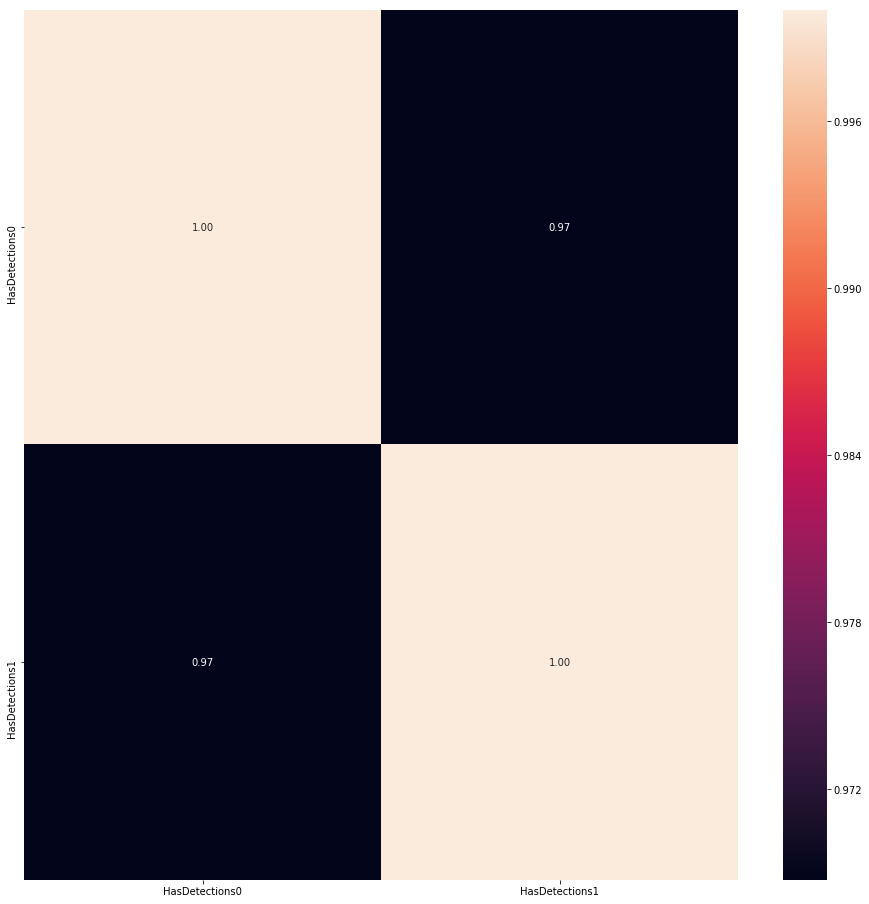

In [6]:
plt.figure(figsize=(16,16))
sns.heatmap(df_base.iloc[:,1:].corr(),annot=True,fmt=".2f")

In [ ]:
#SOLUTION = MEAN OF COLUMNS
df_base['HasDetections'] = df_base.iloc[:,1:].mean(axis=1)
#df_base[['MachineIdentifier','HasDetections']].to_csv("v1.csv",index=False)

In [7]:
df_base.columns


Index(['MachineIdentifier', 'HasDetections0', 'HasDetections1'], dtype='object')

In [8]:
df_base['HasDetections']=.7*df_base['HasDetections0']+.3*df_base['HasDetections1']

In [10]:
df_base[['MachineIdentifier','HasDetections']].to_csv("v10.csv",index=False)

In [11]:
!zip v10.zip v10.csv

  adding: v10.csv (deflated 47%)


In [9]:
df_base.head()

,MachineIdentifier,HasDetections0,HasDetections1,HasDetections
0,0000010489e3af074adeac69c53e555e,0.572857,0.572761,0.572828
1,00000176ac758d54827acd545b6315a5,0.583786,0.674496,0.610999
2,0000019dcefc128c2d4387c1273dae1d,0.598078,0.773024,0.650562
3,0000055553dc51b1295785415f1a224d,0.401889,0.346037,0.385134
4,00000574cefffeca83ec8adf9285b2bf,0.524374,0.495768,0.515793


In [ ]:
def cleaner(row):
    if row['HasDetections'] > 0.8:
        return 1.
    elif row['HasDetections'] < 0.2:
        return 0
    else:
        return row['HasDetections']
    
df_base['HasDetections']=df_base.apply(lambda row: cleaner(row), axis=1)

In [ ]:
df_base.head()

In [ ]:
df_base.hist()

In [ ]:
df_base.describe()

In [ ]:
delta=0.5-df_base.HasDetections.mean()

In [ ]:
delta